In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tree import *
from brains import *
from utils import *

In [2]:
def evolution(start_trees: list[Tree], generations: int, survivors: int = 10, reproductivity: int = 5, grow: int = 5,
              lr_factor: float = 1., lr_power: float = 1.5, plot=100):
    children = start_trees
    children = sorted(children, key=lambda x: -x.gain())

    for generation in range(generations):
        # select parents and clear
        parents = children[:survivors]
        children = []
        for parent in parents:
            for lr in lr_factor * np.power(np.random.rand(reproductivity), lr_power):
                tree = Tree(parent.brain.mutate(lr))
                for _ in range(grow):
                    tree.grow()
                children.append(tree)

        children = sorted(children, key=lambda x: -x.gain())
        print(f'\rgeneration {generation}/{generations} | gain: {children[0].gain():.2f}', end='')

        if generation % plot == plot - 1:
            plt.title(f'{children[0].brain.describe()}, gain: {children[0].gain()}')
            children[0].draw()
            plt.show()

    return children[0]

generation 99/1000 | gain: 25.01

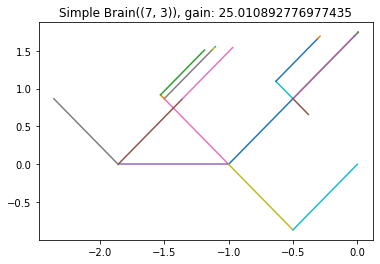

generation 199/1000 | gain: 26.56

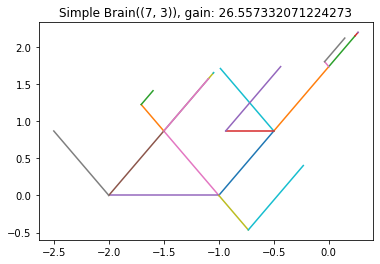

generation 299/1000 | gain: 27.60

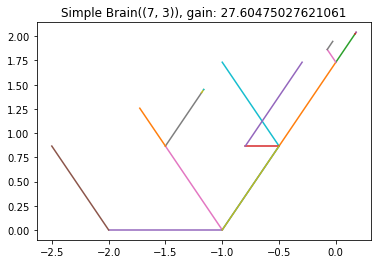

generation 399/1000 | gain: 27.22

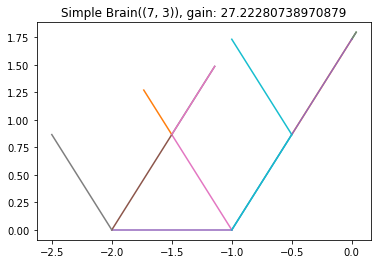

generation 499/1000 | gain: 27.74

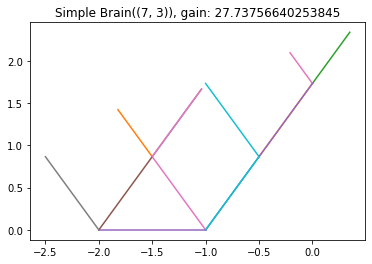

generation 599/1000 | gain: 27.54

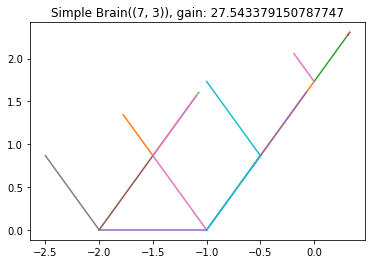

generation 699/1000 | gain: 27.64

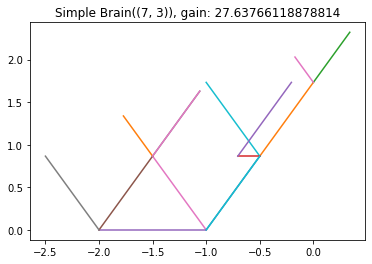

generation 799/1000 | gain: 27.71

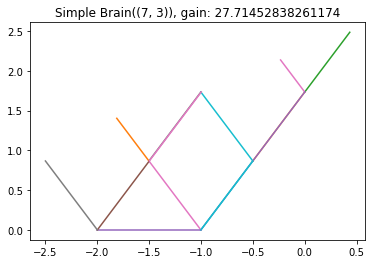

generation 899/1000 | gain: 27.70

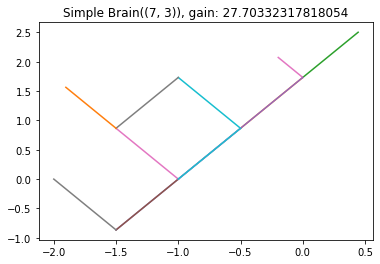

generation 999/1000 | gain: 27.85

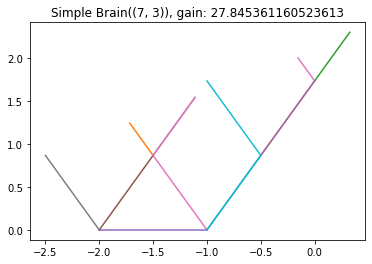

In [3]:
evolution([Tree(SimpleBrain())], 1000)

generation 1999/2000 | gain: 27.69

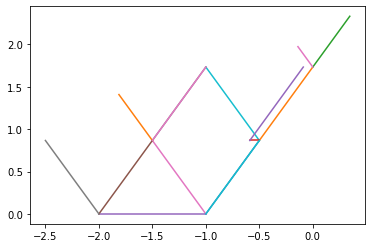

In [4]:
best = evolution([Tree(SimpleBrain())], 2000, plot=-1)
best.draw()
plt.show()

In [5]:
class LuckyBrain(TreeBrain):
    def __init__(self, weights: np.array = None):
        self.happy = True
        self.weights = weights if weights is not None else np.random.random((TreeNode.features_shape + 3, 3))

    def feed_features(self, x: np.ndarray, row: int):
        return logistic(
            self.weights[0, row] + self.weights[1, row] + self.weights[2, row] * np.dot(x, self.weights[3:, row]))

    def describe(self):
        return f'LuckyBrain({self.weights.shape=})'

    def wants_to_grow(self, here: TreeNode) -> float:
        return self.feed_features(here.features(), 0)

    def angle(self, here: TreeNode) -> int:
        return int((TreeNode.angles - 1) * self.feed_features(here.features(), 1))

    def ratio(self, here: TreeNode) -> float:
        return self.feed_features(here.features(), 2)

    def mutate(self, lr: float = 0.01) -> 'TreeBrain':
        delta = np.random.random(self.weights.shape) - 0.5
        delta = delta / np.linalg.norm(delta)
        return LuckyBrain(self.weights + delta * lr)

generation 99/1500 | gain: 23.81

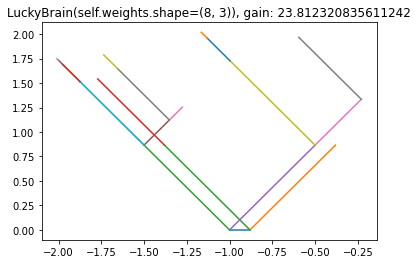

generation 199/1500 | gain: 26.90

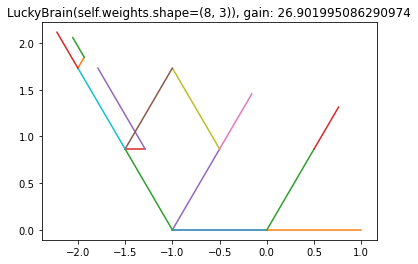

generation 299/1500 | gain: 26.79

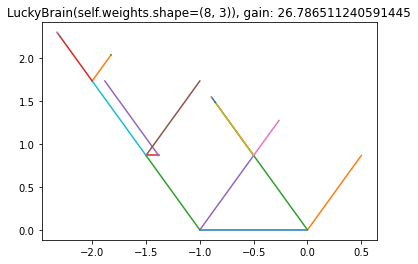

generation 399/1500 | gain: 26.91

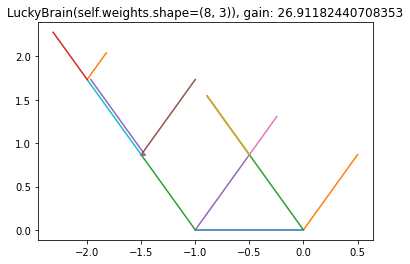

generation 499/1500 | gain: 27.12

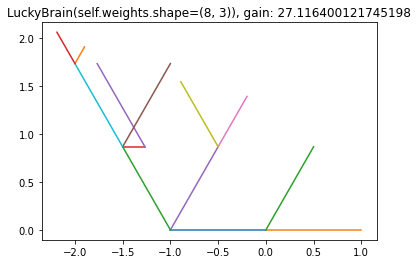

generation 599/1500 | gain: 27.47

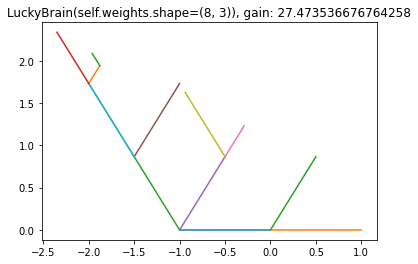

generation 699/1500 | gain: 26.81

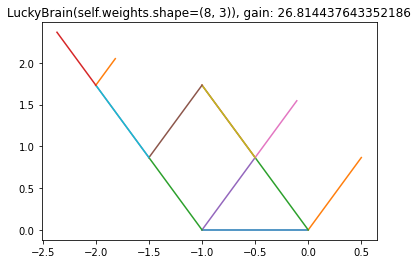

generation 799/1500 | gain: 27.19

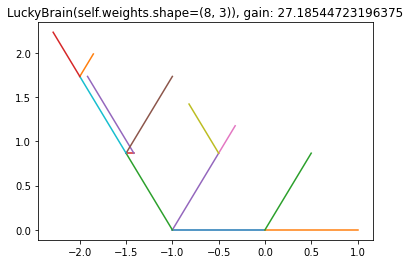

generation 899/1500 | gain: 26.29

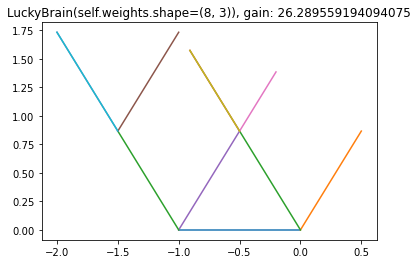

generation 999/1500 | gain: 26.88

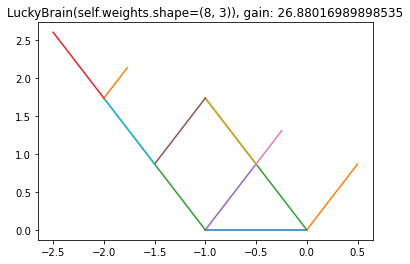

generation 1099/1500 | gain: 27.67

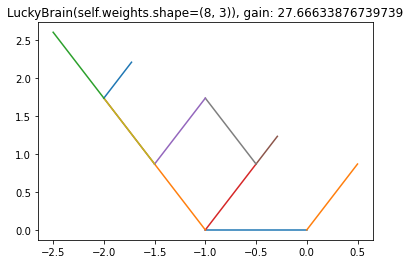

generation 1199/1500 | gain: 26.92

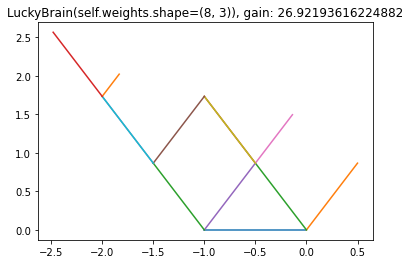

generation 1299/1500 | gain: 26.91

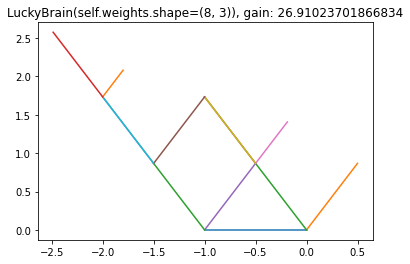

generation 1399/1500 | gain: 26.95

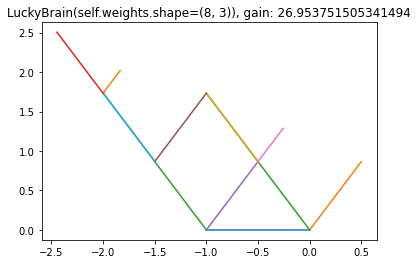

generation 1499/1500 | gain: 27.71

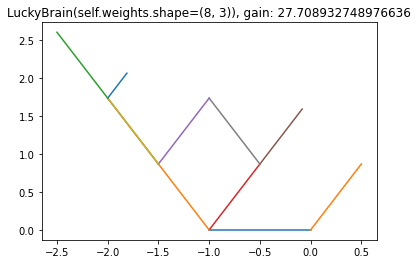

In [6]:
evolution([Tree(LuckyBrain()) for _ in range(100)], 1500, survivors=20, reproductivity=3)

generation 99/1000 | gain: 26.33

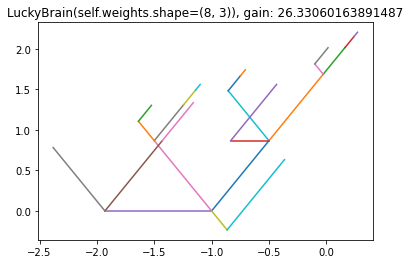

generation 199/1000 | gain: 27.04

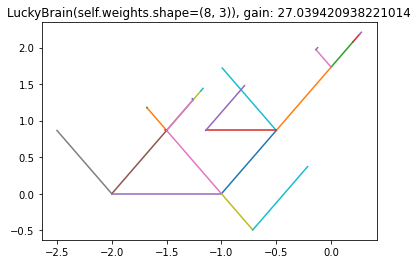

generation 299/1000 | gain: 27.37

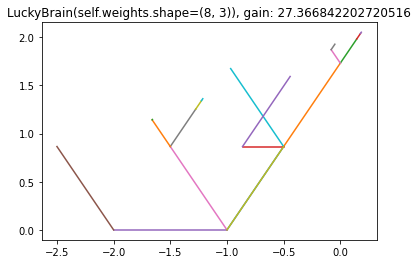

generation 399/1000 | gain: 27.69

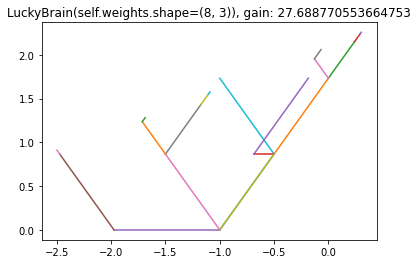

generation 499/1000 | gain: 27.70

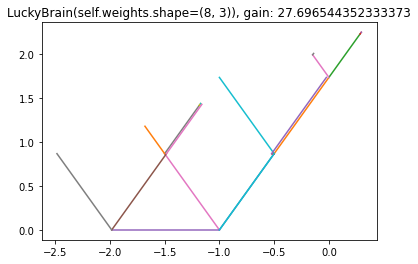

generation 599/1000 | gain: 27.63

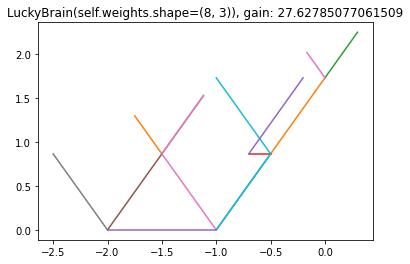

generation 699/1000 | gain: 27.78

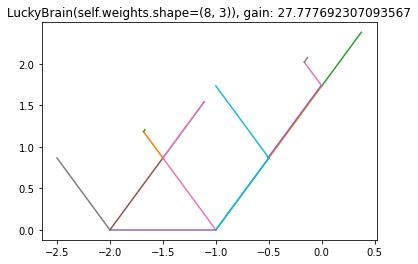

generation 799/1000 | gain: 27.69

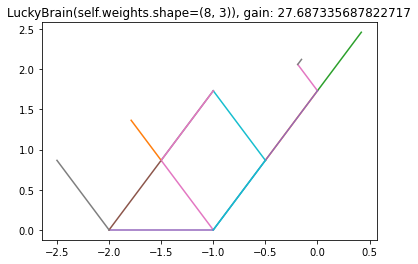

generation 899/1000 | gain: 27.72

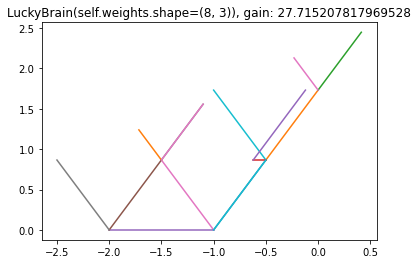

generation 999/1000 | gain: 27.76

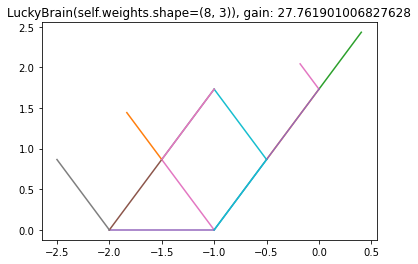

In [7]:
tree = evolution([Tree(LuckyBrain()) for _ in range(100)], 1000, survivors=10, lr_factor=10., lr_power=2,
                 reproductivity=10)

In [11]:
class SquareBrain(TreeBrain):
    def __init__(self, weights: np.ndarray = None):
        self.weights = np.random.random((2 * TreeNode.features_shape + 2, 3)) if weights is None else weights

    def describe(self):
        return f'SquareBrain({self.weights.shape})'

    def feed_features(self, x: np.ndarray, row):
        product = np.dot(self.weights[2:2 + TreeNode.features_shape, row], x) \
                  + np.dot(self.weights[2 + TreeNode.features_shape:2 + 2 * TreeNode.features_shape, row], np.power(x, 2))
        return logistic(self.weights[0, row] + self.weights[1, row] * random.random() + product)

    def angle(self, here: TreeNode) -> int:
        return int((TreeNode.angles - 1) * self.feed_features(here.features(), 0))

    def ratio(self, here: TreeNode) -> float:
        return self.feed_features(here.features(), 1)

    def wants_to_grow(self, here: TreeNode) -> float:
        return self.feed_features(here.features(), 2)

    def mutate(self, lr: float = 0.01) -> 'TreeBrain':
        delta = (np.random.random(self.weights.shape) - 0.5)
        delta = delta / np.linalg.norm(delta)
        weights = self.weights + delta * lr
        return SquareBrain(weights)

generation 99/1000 | gain: 0.00

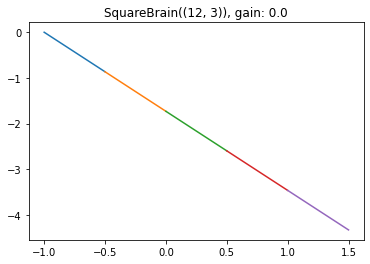

generation 199/1000 | gain: 0.00

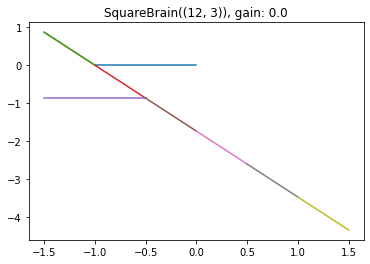

generation 299/1000 | gain: 12.19

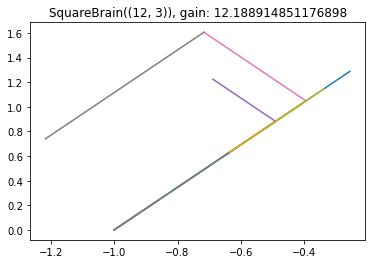

generation 399/1000 | gain: 20.09

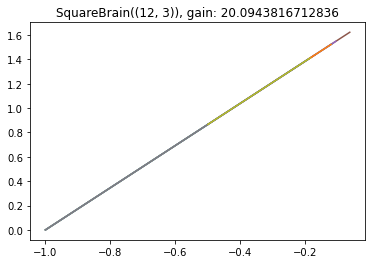

generation 499/1000 | gain: 21.11

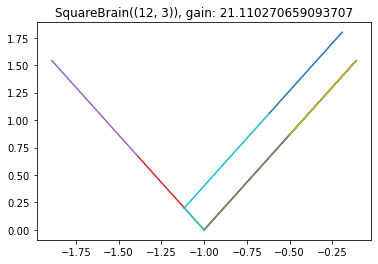

generation 599/1000 | gain: 21.55

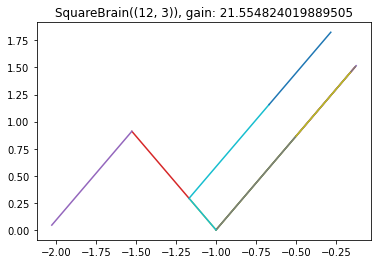

generation 699/1000 | gain: 21.38

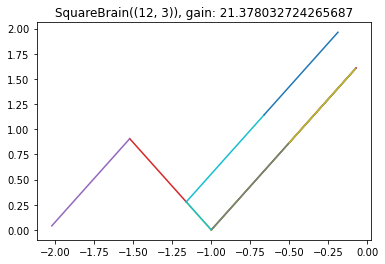

generation 799/1000 | gain: 21.38

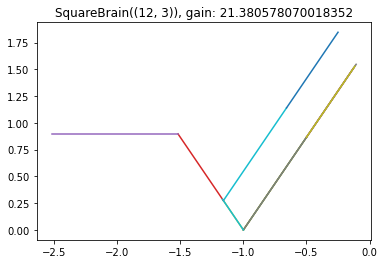

generation 899/1000 | gain: 21.28

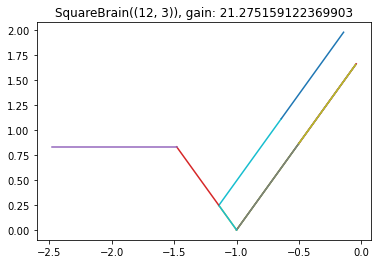

generation 999/1000 | gain: 21.54

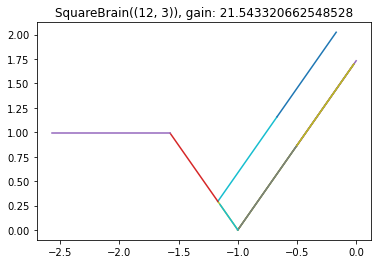

In [12]:
tree = evolution([Tree(SquareBrain()) for _ in range(100)], 1000, 20)

In [13]:
print(tree.brain.weights)

[[ 1.65869879  0.38498653 -0.86674198]
 [-0.012186    0.11145671  1.67620202]
 [ 3.5735356  -2.48880974 -1.55385609]
 [ 0.43961605 -0.05432163 -0.13245161]
 [-1.44526759  1.07436473 -1.01511992]
 [ 2.06014605  0.84922736  0.36508772]
 [-0.39755057  3.18530429  1.63996276]
 [ 2.07731068  1.75671566  3.0216658 ]
 [-0.42426264 -0.61350205 -0.78073292]
 [ 1.29299232 -2.31093983 -1.0641827 ]
 [-0.51510207 -1.33876289  1.06075818]
 [-1.83617771 -3.35892516  1.00507031]]


generation 99/100 | gain: 21.49

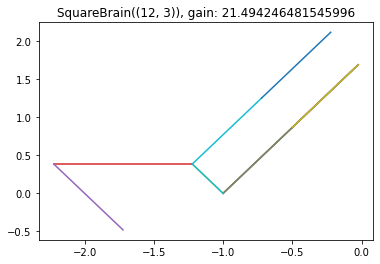

In [15]:
tree = evolution([tree], 100, 10, 10, lr_power=3., lr_factor=5)